# Analyzing Police Activity in Rhode Island state


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [2]:
df = pd.read_csv('police.csv')
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
df.shape

(91741, 15)

In [4]:
df.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

## Data Cleaning 

### Dealing with missing values

#### Since this is only one state we will drop the state column, and we will drop the country name since all its values are missing

In [5]:
df.drop(['county_name', 'state'], axis='columns', inplace=True)
df.shape

(91741, 13)

In [6]:
df.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

#### the columns (driver gender, driver race, violation_raw, violation, stop_outcome, is_arrested, stop_duration) have the same number of null values which means that they are probably the same rows 
#### we will drop these rows

In [7]:
df.dropna(subset=['driver_gender'], inplace=True)
df.isna().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [8]:
df.shape

(86536, 13)

### Data types

In [9]:
df.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [10]:
df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [11]:
## change is_arrested, drugs_related_stop to bool
df['is_arrested'] = df['stop_date'].astype('bool')
df['drugs_related_stop'] = df['drugs_related_stop'].astype('bool')

df.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [12]:
# combine stop_date, stop_time in one col and convert it to datetime
combined = df['stop_date'].str.cat(df['stop_time'], sep = ' ')

# Convert 'combined' to datetime format
df['stop_datetime'] = pd.to_datetime(combined)

# drop the two columns
df.drop(['stop_date', 'stop_time'], axis='columns', inplace=True)

df.dtypes

driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [13]:
# convert dataframe to time series by setting the index to stop_datetime
df.set_index('stop_datetime', inplace=True)
df.head(2)

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,True,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,True,0-15 Min,False,Zone K3


### Data consistency 

In [14]:
cols = ['driver_gender', 'driver_race', 'violation', 'search_conducted', 'search_type', 'stop_outcome', 'is_arrested', 'stop_duration']
for col in cols:
    print(30* '--')
    print (df[col].value_counts())
    print(30* '--')


------------------------------------------------------------
M    62762
F    23774
Name: driver_gender, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
False    83229
True      3307
Name: search_conducted, dtype: int64
------------------------------------------------------------
------------------------------------------------------------
In

## Exploring data

### Do the genders commit different violations?

In [15]:
df.violation.value_counts(normalize = True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

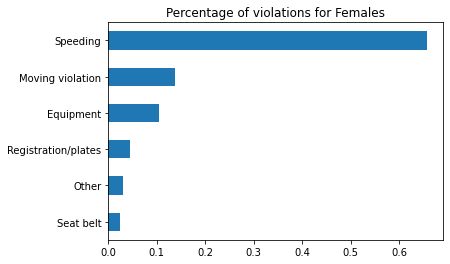

In [16]:
df[df['driver_gender'] == 'F'].violation.value_counts(normalize = True).sort_values()\
                                                    .plot(kind = 'barh', title = "Percentage of violations for Females"); 
                                                                

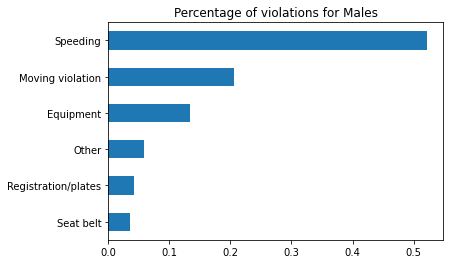

In [17]:
df[df['driver_gender'] == 'M'].violation.value_counts(normalize = True).sort_values()\
                                                    .plot(kind = 'barh', title = "Percentage of violations for Males"); 

***Females are more likly to get a speeding violation than males***

### Does gender affect whose vehicle is searched?

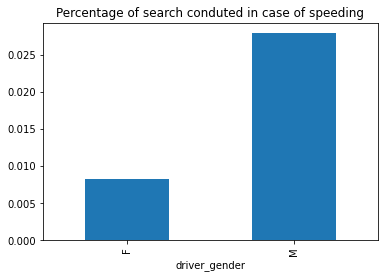

In [18]:
# does a specific gender gets searched more in case of speeding violation
speeding = df[df['violation'] == 'Speeding']
speeding.groupby('driver_gender')['search_conducted'].mean().plot(kind = 'bar', 
                                                                  title = 'Percentage of search conduted in case of speeding');

***We can see that men are most likly get searched*** 

### Does gender affect who is frisked during a search?

In [19]:
df['frisk'] = df.search_type.str.contains('Protective Frisk', na=False)

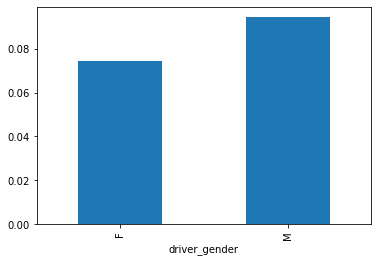

In [20]:
df[df.search_conducted == True].groupby('driver_gender').frisk.mean().plot(kind = 'bar');

***Males are more likly to get frisked during a seacrch compared to women***

### Does time of day affect search rate?


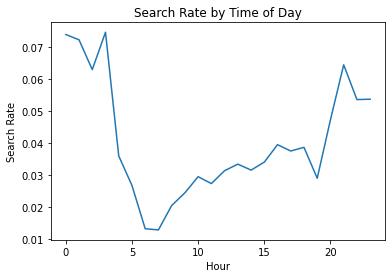

In [21]:
df.groupby(df.index.hour)['search_conducted'].mean().plot()
plt.xlabel('Hour')
plt.ylabel('Search Rate')
plt.title('Search Rate by Time of Day')

plt.show();

### Are drug-related stops on the rise?


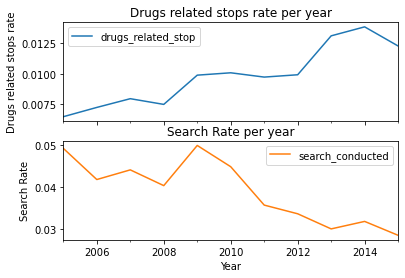

In [22]:
annual_drug_rate = df.drugs_related_stop.resample('A').mean()
annual_search_rate = df.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

ax = annual.plot(subplots=True)
plt.rcParams["figure.figsize"] = [8, 8]
ax[0].set_title("Drugs related stops rate per year")
ax[0].set_ylabel("Drugs related stops rate")

ax[1].set_title("Search Rate per year")
ax[1].set_ylabel("Search Rate")
ax[1].set_xlabel("Year")
plt.show();

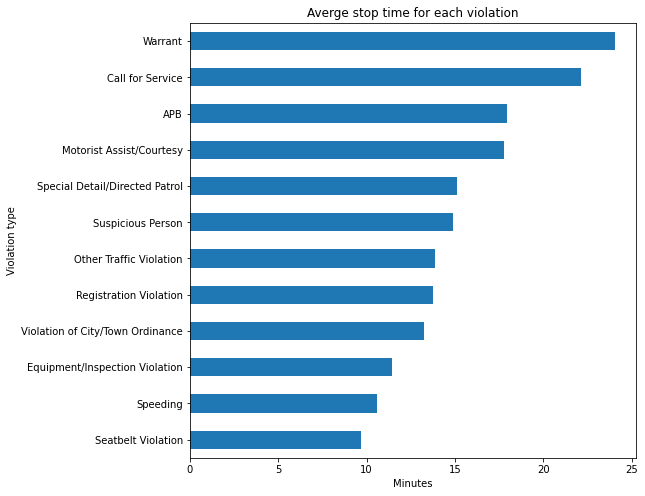

In [23]:
# since there is no defined time we will approximate their values
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min': 45}
df['stop_time'] = df.stop_duration.replace(mapping)
df.groupby('violation_raw')['stop_time'].mean().sort_values().plot(kind = 'barh')
plt.xlabel('Minutes')
plt.ylabel('Violation type')
plt.title('Averge stop time for each violation')

plt.show();